In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import numpy as np

from PIL import Image

import json

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import Bunch

In [20]:
target = []
images = []
row_images = []

with open('labels.json') as f:
    data = json.load(f)
    labels = [i for i in set(data.values())]
    
for i in data.values():
    if i in labels:
        target.append(labels.index(i))
        
for i in range(1, 2717):
    image = np.array(Image.open(f'samples/{i}.png'))
    images.append(image)
    row_images.append(image.flatten())

In [21]:
labels = np.array(labels, dtype='<U17')

target = np.array(target, dtype='int64')

images = np.array(images)

row_images = np.array(row_images)

bacterias = Bunch(target = target, target_names=labels, images=images, data=row_images)

In [22]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(bacterias.data, bacterias.target, random_state=42)

In [24]:
param_grid = {'svc__C': [25, 30, 35],'svc__gamma': [0.001, 0.0015, 0.002]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 5min 52s
{'svc__C': 30, 'svc__gamma': 0.0015}


In [25]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

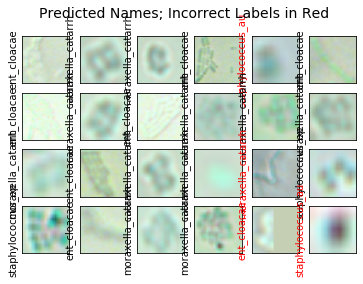

In [26]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(128, 128, 3), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(bacterias.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [27]:
print(classification_report(ytest, yfit, target_names=bacterias.target_names))

                   precision    recall  f1-score   support

          c_kefir       0.98      1.00      0.99        46
moraxella_catarrh       0.93      0.95      0.94       299
staphylococcus_ep       0.73      0.65      0.69        94
staphylococcus_au       0.56      0.57      0.56        35
klebsiella_pneumo       0.57      0.57      0.57        14
      ent_cloacae       0.94      0.96      0.95       191

         accuracy                           0.89       679
        macro avg       0.79      0.78      0.78       679
     weighted avg       0.88      0.89      0.88       679

